In [5]:
import numpy as np
import os
import matplotlib.pyplot as plt

sgd_fs = [f for f in os.listdir() if f.endswith('.npy') and ('sgd.' in f) and 'sc' not in f and '2f' not in f]
sgd_fs = sorted(sgd_fs, key=lambda x: float(x.split('_')[0]))
print(sgd_fs)

sgd_only_fs = [f for f in os.listdir() if f.endswith('.npy') and ('sgd_only.' in f) and 'sc' not in f and '2f' not in f]
sgd_only_fs = sorted(sgd_only_fs, key=lambda x: float(x.split('_')[0]))
print(sgd_only_fs)

['10_1000_sgd_sgd.npy', '20_1000_sgd_sgd.npy', '40_1000_sgd_sgd.npy', '80_1000_sgd_sgd.npy', '160_1000_sgd_sgd.npy', '320_1000_sgd_sgd.npy']
['10_1000_sgd_sgd_only.npy', '20_1000_sgd_sgd_only.npy', '40_1000_sgd_sgd_only.npy', '80_1000_sgd_sgd_only.npy', '160_1000_sgd_sgd_only.npy', '320_1000_sgd_sgd_only.npy']


In [6]:
losses = [np.load(file, allow_pickle=True)[0] for file in sgd_fs]
gap = [np.load(file, allow_pickle=True)[1] for file in sgd_fs]
ratio = [np.load(file, allow_pickle=True)[2] for file in sgd_fs]

losses_shadow = [np.load(file, allow_pickle=True)[3] for file in sgd_fs]
ratio_shadow = [np.load(file, allow_pickle=True)[4] for file in sgd_fs]

loss_precision = [np.load(file, allow_pickle=True)[5] for file in sgd_fs]
ratio_precision = [np.load(file, allow_pickle=True)[6] for file in sgd_fs]

loss_precision_calibrate = [np.load(file, allow_pickle=True)[7] for file in sgd_fs]
ratio_precision_calibrate = [np.load(file, allow_pickle=True)[8] for file in sgd_fs]

loss_precision_shadow = [np.load(file, allow_pickle=True)[9] for file in sgd_fs]
ratio_precision_shadow = [np.load(file, allow_pickle=True)[10] for file in sgd_fs]

nup_losses = [np.load(file, allow_pickle=True)[11] for file in sgd_fs]
nup_gap = [np.load(file, allow_pickle=True)[12] for file in sgd_fs]

nup_losses_shadow = [np.load(file, allow_pickle=True)[13] for file in sgd_fs]

nup_loss_precision = [np.load(file, allow_pickle=True)[14] for file in sgd_fs]

nup_loss_precision_shadow = [np.load(file, allow_pickle=True)[15] for file in sgd_fs]

nup_loss_precision_calibrate = [np.load(file, allow_pickle=True)[16] for file in sgd_fs]

initial_train_acc = [np.load(file, allow_pickle=True)[17] for file in sgd_fs]
initial_test_acc = [np.load(file, allow_pickle=True)[18] for file in sgd_fs]
post_train_acc = [np.load(file, allow_pickle=True)[19] for file in sgd_fs]
post_test_acc = [np.load(file, allow_pickle=True)[20] for file in sgd_fs]

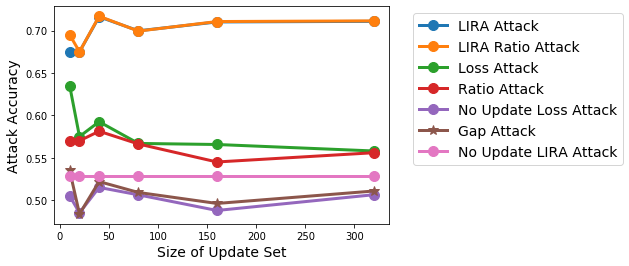

In [8]:
ds = [10, 20, 40, 80, 160, 320]

plt.plot(ds, [0.675, 0.6749999999999999, 0.7162499999999999, 0.6996874999999999, 0.7101562499999999, 0.710859375], 
         'o', label='LIRA Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [0.695, 0.6749999999999999, 0.716875, 0.699375, 0.710625, 0.7114062499999999], 
         'o', label='LIRA Ratio Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in losses], 
         'o', label='Loss Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in ratio], 
         'o', label='Ratio Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in nup_losses], 
         'o', label='No Update Loss Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in gap], 
         '*', label='Gap Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [0.5286979166666669, 0.5286979166666669, 0.5286979166666669, 0.5286979166666669, 0.5286979166666669, 0.5286979166666669], 
         'o', label='No Update LIRA Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('Attack Accuracy', fontsize=14) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
# plt.savefig('fmnist_condensed_sgd.png')
plt.show()

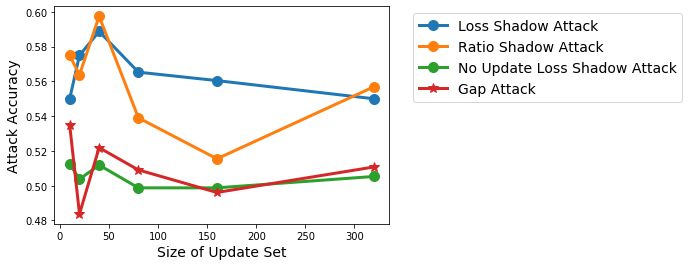

In [4]:
ds = [10, 20, 40, 80, 160, 320]

plt.plot(ds, [np.mean(x) for x in losses_shadow], 
         'o', label='Loss Shadow Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in ratio_shadow], 
         'o', label='Ratio Shadow Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in nup_losses_shadow], 
         'o', label='No Update Loss Shadow Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in gap], 
         '*', label='Gap Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('Attack Accuracy', fontsize=14) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.savefig('fmnist_shadow_condensed_sgd.png')
plt.show()

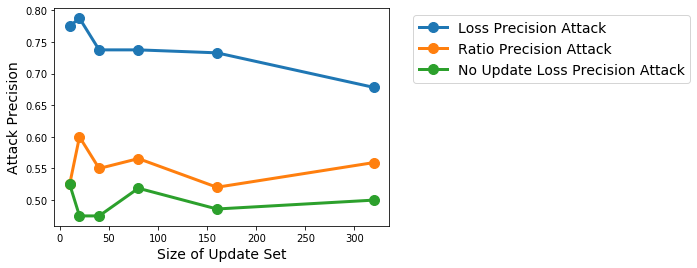

In [5]:
ds = [10, 20, 40, 80, 160, 320]

plt.plot(ds, [np.mean([i[0] for i in x]) for x in loss_precision], 
         'o', label='Loss Precision Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean([i[0] for i in x]) for x in ratio_precision], 
         'o', label='Ratio Precision Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean([i[0] for i in x]) for x in nup_loss_precision], 
         'o', label='No Update Loss Precision Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('Attack Precision', fontsize=14) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.savefig('fmnist_precision_condensed_sgd.png')
plt.show()

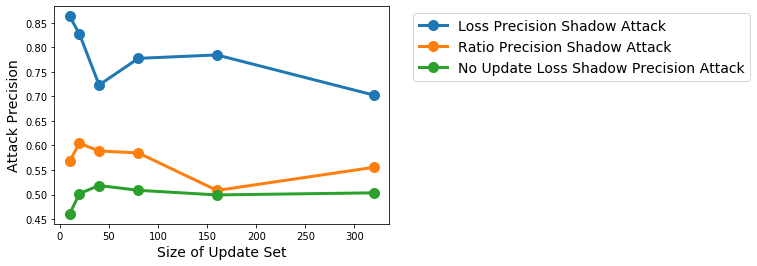

In [6]:
ds = [10, 20, 40, 80, 160, 320]

plt.plot(ds, [np.nanmean([i[0] for i in x]) for x in loss_precision_shadow], 
         'o', label='Loss Precision Shadow Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.nanmean([i[0] for i in x]) for x in ratio_precision_shadow], 
         'o', label='Ratio Precision Shadow Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.nanmean([i[0] for i in x]) for x in nup_loss_precision_shadow], 
         'o', label='No Update Loss Shadow Precision Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('Attack Precision', fontsize=14) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.savefig('fmnist_shadow_precision_condensed_sgd.png')
plt.show()

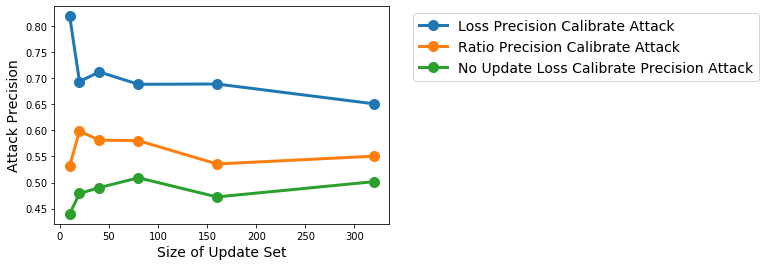

In [7]:
ds = [10, 20, 40, 80, 160, 320]

plt.plot(ds, [np.nanmean([i[1][0] for i in x]) for x in loss_precision_calibrate], 
         'o', label='Loss Precision Calibrate Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.nanmean([i[1][0] for i in x]) for x in ratio_precision_calibrate], 
         'o', label='Ratio Precision Calibrate Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.nanmean([i[1][0] for i in x]) for x in nup_loss_precision_calibrate], 
         'o', label='No Update Loss Calibrate Precision Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('Attack Precision', fontsize=14) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.savefig('fmnist_calibrate_precision_condensed_sgd.png')
plt.show()

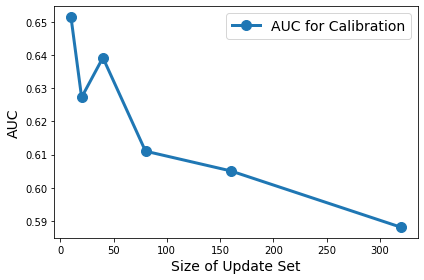

0.6514416292272184 0.6110175980267006


In [8]:
from sklearn.metrics import auc

total_precisions = [[np.nanmean([i[percentile][0] for i in x]) for percentile in range(11)] for x in loss_precision_calibrate]
total_recalls = [[np.nanmean([i[percentile][1] for i in x]) for percentile in range(11)] for x in loss_precision_calibrate]
aucs = []

for precisions, recalls in zip(total_precisions, total_recalls):
#     print(precisions)
#     print(recalls)
#     print('===============')
    aucs.append(auc(recalls, precisions))
    
plt.plot(ds, aucs, 
         'o', label='AUC for Calibration', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('AUC', fontsize=14) 
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

print(aucs[0], aucs[3])

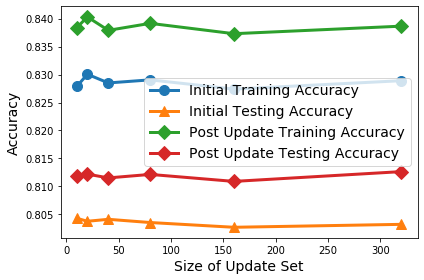

In [9]:
ds = [10, 20, 40, 80, 160, 320]

plt.plot(ds, [np.mean(x) for x in initial_train_acc], 
         'o', label='Initial Training Accuracy', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in initial_test_acc], 
         '^', label='Initial Testing Accuracy', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in post_train_acc], 
         'D', label='Post Update Training Accuracy', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in post_test_acc], 
         'D', label='Post Update Testing Accuracy', 
         linestyle='-', linewidth=3, markersize=10)
# plt.ylim(0.5, 0.675)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('Accuracy', fontsize=14) 
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

In [10]:
losses = [np.load(file, allow_pickle=True)[0] for file in sgd_only_fs]
gap = [np.load(file, allow_pickle=True)[1] for file in sgd_only_fs]
ratio = [np.load(file, allow_pickle=True)[2] for file in sgd_only_fs]

losses_shadow = [np.load(file, allow_pickle=True)[3] for file in sgd_only_fs]
ratio_shadow = [np.load(file, allow_pickle=True)[4] for file in sgd_only_fs]

loss_precision = [np.load(file, allow_pickle=True)[5] for file in sgd_only_fs]
ratio_precision = [np.load(file, allow_pickle=True)[6] for file in sgd_only_fs]

loss_precision_calibrate = [np.load(file, allow_pickle=True)[7] for file in sgd_only_fs]
ratio_precision_calibrate = [np.load(file, allow_pickle=True)[8] for file in sgd_only_fs]

loss_precision_shadow = [np.load(file, allow_pickle=True)[9] for file in sgd_only_fs]
ratio_precision_shadow = [np.load(file, allow_pickle=True)[10] for file in sgd_only_fs]

nup_losses = [np.load(file, allow_pickle=True)[11] for file in sgd_only_fs]
nup_gap = [np.load(file, allow_pickle=True)[12] for file in sgd_only_fs]

nup_losses_shadow = [np.load(file, allow_pickle=True)[13] for file in sgd_only_fs]

nup_loss_precision = [np.load(file, allow_pickle=True)[14] for file in sgd_only_fs]

nup_loss_precision_shadow = [np.load(file, allow_pickle=True)[15] for file in sgd_only_fs]

nup_loss_precision_calibrate = [np.load(file, allow_pickle=True)[16] for file in sgd_only_fs]

initial_train_acc = [np.load(file, allow_pickle=True)[17] for file in sgd_only_fs]
initial_test_acc = [np.load(file, allow_pickle=True)[18] for file in sgd_only_fs]
post_train_acc = [np.load(file, allow_pickle=True)[19] for file in sgd_only_fs]
post_test_acc = [np.load(file, allow_pickle=True)[20] for file in sgd_only_fs]

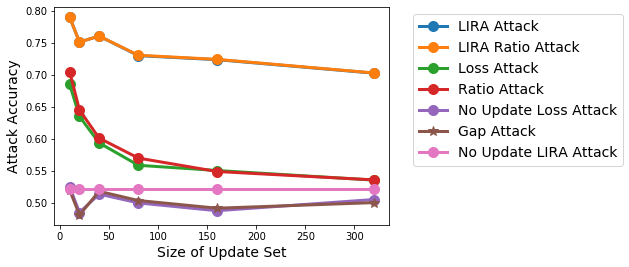

In [11]:
ds = [10, 20, 40, 80, 160, 320]

plt.plot(ds, [0.79, 0.75125, 0.7606249999999999, 0.7299999999999999, 0.7237500000000001, 0.7026562500000002], 
         'o', label='LIRA Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [0.79, 0.75125, 0.7606249999999999, 0.7306250000000001, 0.7242187500000001, 0.7029687500000001], 
         'o', label='LIRA Ratio Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in losses], 
         'o', label='Loss Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in ratio], 
         'o', label='Ratio Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in nup_losses], 
         'o', label='No Update Loss Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in gap], 
         '*', label='Gap Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [0.5222916666666666, 0.5222916666666666, 0.5222916666666666, 0.5222916666666666, 0.5222916666666666, 0.5222916666666666], 
         'o', label='No Update LIRA Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('Attack Accuracy', fontsize=14) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.savefig('fmnist_condensed_sgd_only.png')
plt.show()

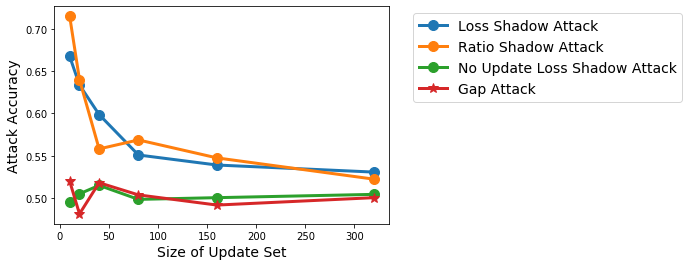

In [12]:
ds = [10, 20, 40, 80, 160, 320]

plt.plot(ds, [np.mean(x) for x in losses_shadow], 
         'o', label='Loss Shadow Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in ratio_shadow], 
         'o', label='Ratio Shadow Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in nup_losses_shadow], 
         'o', label='No Update Loss Shadow Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in gap], 
         '*', label='Gap Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('Attack Accuracy', fontsize=14) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.savefig('fmnist_shadow_condensed_sgd_only.png')
plt.show()

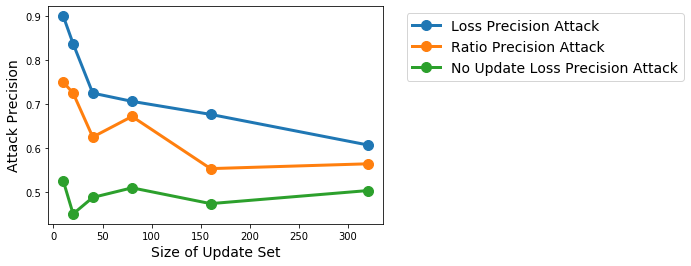

In [13]:
ds = [10, 20, 40, 80, 160, 320]

plt.plot(ds, [np.mean([i[0] for i in x]) for x in loss_precision], 
         'o', label='Loss Precision Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean([i[0] for i in x]) for x in ratio_precision], 
         'o', label='Ratio Precision Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean([i[0] for i in x]) for x in nup_loss_precision], 
         'o', label='No Update Loss Precision Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('Attack Precision', fontsize=14) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.savefig('fmnist_precision_condensed_sgd_only.png')
plt.show()

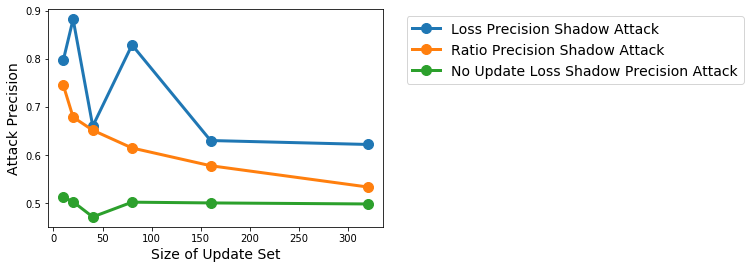

In [14]:
ds = [10, 20, 40, 80, 160, 320]

plt.plot(ds, [np.nanmean([i[0] for i in x]) for x in loss_precision_shadow], 
         'o', label='Loss Precision Shadow Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.nanmean([i[0] for i in x]) for x in ratio_precision_shadow], 
         'o', label='Ratio Precision Shadow Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.nanmean([i[0] for i in x]) for x in nup_loss_precision_shadow], 
         'o', label='No Update Loss Shadow Precision Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('Attack Precision', fontsize=14) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.savefig('fmnist_shadow_precision_condensed_sgd_only.png')
plt.show()

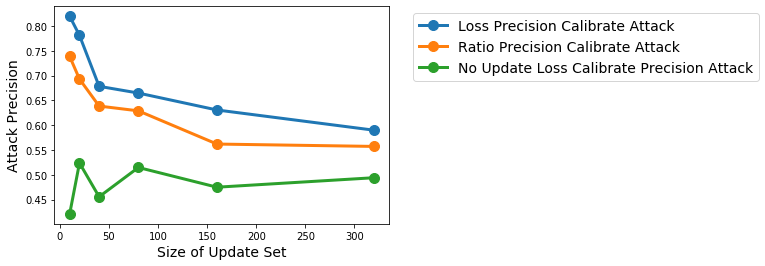

In [15]:
ds = [10, 20, 40, 80, 160, 320]

plt.plot(ds, [np.nanmean([i[1][0] for i in x]) for x in loss_precision_calibrate], 
         'o', label='Loss Precision Calibrate Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.nanmean([i[1][0] for i in x]) for x in ratio_precision_calibrate], 
         'o', label='Ratio Precision Calibrate Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.nanmean([i[1][0] for i in x]) for x in nup_loss_precision_calibrate], 
         'o', label='No Update Loss Calibrate Precision Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('Attack Precision', fontsize=14) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.savefig('fmnist_calibrate_precision_condensed_sgd_only.png')
plt.show()

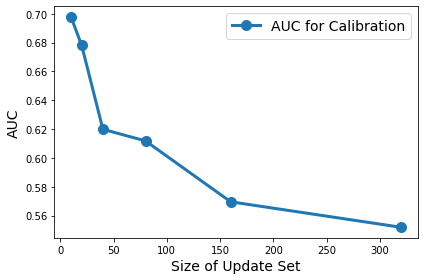

0.6978552399446314 0.6118222201795142


In [16]:
from sklearn.metrics import auc

total_precisions = [[np.nanmean([i[percentile][0] for i in x]) for percentile in range(11)] for x in loss_precision_calibrate]
total_recalls = [[np.nanmean([i[percentile][1] for i in x]) for percentile in range(11)] for x in loss_precision_calibrate]
aucs = []

for precisions, recalls in zip(total_precisions, total_recalls):
#     print(precisions)
#     print(recalls)
#     print('===============')
    aucs.append(auc(recalls, precisions))
    
plt.plot(ds, aucs, 
         'o', label='AUC for Calibration', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('AUC', fontsize=14) 
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()
print(aucs[0], aucs[3])

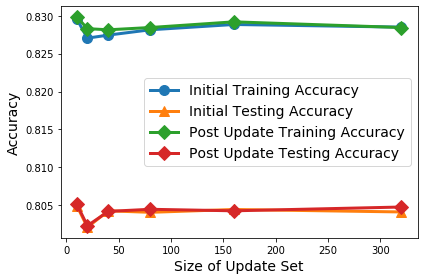

In [17]:
ds = [10, 20, 40, 80, 160, 320]

plt.plot(ds, [np.mean(x) for x in initial_train_acc], 
         'o', label='Initial Training Accuracy', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in initial_test_acc], 
         '^', label='Initial Testing Accuracy', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in post_train_acc], 
         'D', label='Post Update Training Accuracy', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in post_test_acc], 
         'D', label='Post Update Testing Accuracy', 
         linestyle='-', linewidth=3, markersize=10)
# plt.ylim(0.5, 0.675)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('Accuracy', fontsize=14) 
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

[0.5249999999999999, 0.485, 0.51375, 0.5000000000000001, 0.4878125, 0.5053124999999999]


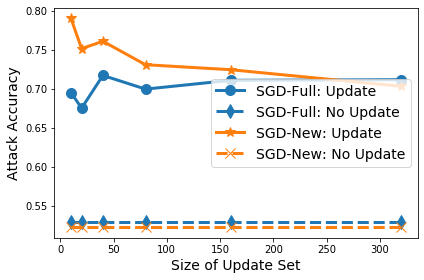

In [14]:
ds = [10, 20, 40, 80, 160, 320]

ratio_median_sgd = [np.load(file, allow_pickle=True)[2] for file in sgd_fs]
ratio_median_sgd_only = [np.load(file, allow_pickle=True)[2] for file in sgd_only_fs]
nup_losses_median_sgd = [np.load(file, allow_pickle=True)[11] for file in sgd_fs]
nup_losses_median_sgd_only = [np.load(file, allow_pickle=True)[11] for file in sgd_only_fs]
ratio_lira_sgd = [0.695, 0.6749999999999999, 0.716875, 0.699375, 0.710625, 0.7114062499999999]
ratio_lira_sgd_only = [0.79, 0.75125, 0.7606249999999999, 0.7306250000000001, 0.7242187500000001, 0.7029687500000001]
print([np.mean(x) for x in nup_losses_median_sgd_only])

plt.plot(ds, [np.mean(x) for x in ratio_lira_sgd], 
         'o', label='SGD-Full: Update', color='C0',
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [0.5286979166666669, 0.5286979166666669, 0.5286979166666669, 0.5286979166666669, 0.5286979166666669, 0.5286979166666669], 
         'd', label='SGD-Full: No Update', color='C0',
         linestyle='--', linewidth=3, markersize=10)
plt.plot(ds, ratio_lira_sgd_only, 
         '*', label='SGD-New: Update', color='C1',
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [0.5222916666666666, 0.5222916666666666, 0.5222916666666666, 0.5222916666666666, 0.5222916666666666, 0.5222916666666666], 
         'x', label='SGD-New: No Update', color='C1', 
         linestyle='--', linewidth=3, markersize=10)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('Attack Accuracy', fontsize=14) 
plt.legend(fontsize=14, loc='right')
plt.tight_layout()
plt.savefig('fmnist_condensed.png')
plt.show()

In [19]:
nup_loss_precision = [np.load(file, allow_pickle=True)[14] for file in sgd_fs]
print(np.mean([x[0] for x in nup_loss_precision[0]]), np.mean([x[1] for x in nup_loss_precision[0]]))
print(np.mean([x[0] for x in nup_loss_precision[3]]), np.mean([x[1] for x in nup_loss_precision[3]]))
print('==================')

loss_precision = [np.load(file, allow_pickle=True)[5] for file in sgd_fs]
print(np.mean([x[0] for x in loss_precision[0]]), np.mean([x[1] for x in loss_precision[0]]))
print(np.mean([x[0] for x in loss_precision[3]]), np.mean([x[1] for x in loss_precision[3]]))
print('==================')

loss_precision_shadow = [np.load(file, allow_pickle=True)[9] for file in sgd_fs]
print(np.nanmean([x[0] for x in loss_precision_shadow[0]]), np.nanmean([x[1] for x in loss_precision_shadow[0]]))
print(np.nanmean([x[0] for x in loss_precision_shadow[3]]), np.nanmean([x[1] for x in loss_precision_shadow[3]]))
print('==================')

loss_precision_calibrate = [np.load(file, allow_pickle=True)[7] for file in sgd_fs]
print(np.mean([x[1][0] for x in loss_precision_calibrate[0]]), np.mean([x[1][1] for x in loss_precision_calibrate[0]]))
print(np.mean([x[1][0] for x in loss_precision_calibrate[3]]), np.mean([x[1][1] for x in loss_precision_calibrate[3]]))
print('==================')

0.525 0.10500000000000001
0.51875 0.10374999999999998
0.775 0.15500000000000005
0.7375 0.14750000000000002
0.8633333333333333 0.24
0.7775471056721057 0.129375
0.819047619047619 0.27999999999999997
0.6884939238164545 0.24937499999999999


In [20]:
nup_loss_precision = [np.load(file, allow_pickle=True)[14] for file in sgd_only_fs]
print(np.mean([x[0] for x in nup_loss_precision[0]]), np.mean([x[1] for x in nup_loss_precision[0]]))
print(np.mean([x[0] for x in nup_loss_precision[3]]), np.mean([x[1] for x in nup_loss_precision[3]]))
print('==================')

loss_precision = [np.load(file, allow_pickle=True)[5] for file in sgd_only_fs]
print(np.mean([x[0] for x in loss_precision[0]]), np.mean([x[1] for x in loss_precision[0]]))
print(np.mean([x[0] for x in loss_precision[3]]), np.mean([x[1] for x in loss_precision[3]]))
print('==================')

loss_precision_shadow = [np.load(file, allow_pickle=True)[9] for file in sgd_only_fs]
print(np.nanmean([x[0] for x in loss_precision_shadow[0]]), np.nanmean([x[1] for x in loss_precision_shadow[0]]))
print(np.nanmean([x[0] for x in loss_precision_shadow[3]]), np.nanmean([x[1] for x in loss_precision_shadow[3]]))
print('==================')

loss_precision_calibrate = [np.load(file, allow_pickle=True)[7] for file in sgd_only_fs]
print(np.mean([x[1][0] for x in loss_precision_calibrate[0]]), np.mean([x[1][1] for x in loss_precision_calibrate[0]]))
print(np.mean([x[1][0] for x in loss_precision_calibrate[3]]), np.mean([x[1][1] for x in loss_precision_calibrate[3]]))
print('==================')

0.525 0.10500000000000001
0.509375 0.10187500000000001
0.9 0.18000000000000005
0.70625 0.14124999999999996
0.7968849206349207 0.475
0.8285749438115166 0.093125
0.8195833333333333 0.38
0.6647223200775831 0.198125


In [21]:
nup_gap = [np.load(file, allow_pickle=True)[12] for file in sgd_fs]
print(np.mean([x for x in nup_gap[0]]))
print('==================')

nup_losses = [np.load(file, allow_pickle=True)[11] for file in sgd_fs]
print(np.mean([x for x in nup_losses[0]]))
print('==================')

losses = [np.load(file, allow_pickle=True)[0] for file in sgd_fs]
print(np.nanmean([x for x in losses[0]]))
print('==================')

losses_shadow = [np.load(file, allow_pickle=True)[3] for file in sgd_fs]
print(np.mean([x for x in losses_shadow[0]]))
print('==================')

ratio = [np.load(file, allow_pickle=True)[2] for file in sgd_fs]
print(np.mean([x for x in ratio[0]]))
print('==================')

ratio_shadow = [np.load(file, allow_pickle=True)[4] for file in sgd_fs]
print(np.mean([x for x in ratio_shadow[0]]))
print('==================')

0.5175
0.505
0.6349999999999999
0.55
0.5699999999999998
0.575


In [22]:
nup_gap = [np.load(file, allow_pickle=True)[12] for file in sgd_only_fs]
print(np.mean([x for x in nup_gap[0]]))
print('==================')

nup_losses = [np.load(file, allow_pickle=True)[11] for file in sgd_only_fs]
print(np.mean([x for x in nup_losses[0]]))
print('==================')

losses = [np.load(file, allow_pickle=True)[0] for file in sgd_only_fs]
print(np.nanmean([x for x in losses[0]]))
print('==================')

losses_shadow = [np.load(file, allow_pickle=True)[3] for file in sgd_only_fs]
print(np.mean([x for x in losses_shadow[0]]))
print('==================')

ratio = [np.load(file, allow_pickle=True)[2] for file in sgd_only_fs]
print(np.mean([x for x in ratio[0]]))
print('==================')

ratio_shadow = [np.load(file, allow_pickle=True)[4] for file in sgd_only_fs]
print(np.mean([x for x in ratio_shadow[0]]))
print('==================')

0.5075000000000001
0.525
0.6849999999999999
0.6675
0.705
0.7150000000000001
